# Voluntary Assignment

The aim of this assignments is to put the basic theory of artificial neural networks into practice, and get an idea of what the structure of compulsory assignments looks like. To complete the assignment, please read the assignment text carefully and fill out the appropriate cells. 

# Introduction 

In this assignment you will implement a neural network with the numpy package in Python and train it for the Handwritten Digits recognition problem. The dataset is comprised of a 60,000 greyscale images with $(28 \times 28)$ pixels. Each image contains a handwritten digit collected by the National Institute of Standards and Technology. The images have already been normalized, and centered so there is no need for preprocessing. 

<center><img src="images/mnist_white.jpeg" width="200" height="200"><img src="images/mnist_black.jpeg" width="200" height="200"></center>

Some code will be provided for you, but you will be asked to implement some functions your self too.
The function *load_data()* in the file [utilities.py](./utilities.py) will download the MNIST dataset the first time you run it, and simply load it from disk after that. 

# Imports

In the code cell below, all the neccesary packages are imported, and the dataset is loaded. 

In [1]:
import time
import numpy as np
from utilities import *
from tqdm import tqdm # Cool progress bar
import matplotlib.pyplot as plt
from utilities import load_mnist

## Importing the data

In [2]:
SEED = 458
RNG = np.random.default_rng(SEED) # Random number generator

datasets = load_mnist()
X_train       = datasets['X_train']
y_train       = datasets['y_train']
X_val         = datasets['X_val']
y_val         = datasets['y_val']
X_test        = datasets['X_test']
y_test        = datasets['y_test']
small_X_train = datasets['small_X_train']
small_y_train = datasets['small_y_train']
small_X_val   = datasets['small_X_val']
small_y_val   = datasets['small_y_val']
del datasets # Good to reduce uneccesary RAM usage

# Normalizing datasets between [0,1]
X_train       = X_train.astype("float32")      /np.max(X_train)
X_val         = X_val.astype("float32")        /np.max(X_val)
X_test        = X_test.astype("float32")       /np.max(X_test)
small_X_train = small_X_train.astype("float32")/np.max(small_X_train)
small_X_val   = small_X_val.astype("float32")  /np.max(small_X_val)

X_train shape (50000, 28, 28)
y_train shape (50000,)
X_val shape (10000, 28, 28)
y_val shape (10000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)
small_X_train shape (1000, 28, 28)
small_y_train shape (1000,)
small_X_val shape (300, 28, 28)
small_y_val shape (300,)


# Visualization

Below is a plot visualizing some examples of the dataset

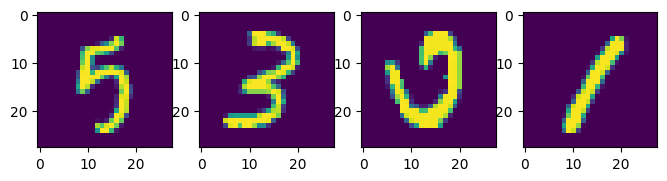

In [3]:
random_images = RNG.choice(X_train, replace=False, size=4)
fig, ax = plt.subplots(1,4,figsize=(8,8))
for i in range(random_images.shape[0]):
    ax[i].imshow(random_images[i])

# Task 1: Compute the derivatives of activation functions

In this task we will consider twe famous activation functions. The sigmoid function and the hyperbolic tangent function. The formulas for each activation function are given below: 

\begin{equation}
    \mathrm{sigmoid}(x) = \frac{1}{1 + e^{-x}}
\end{equation}

\begin{equation}
    \mathrm{tanh}(x) = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}
\end{equation}

The code implementations for each activation function is given below. The first task is to implement the derivatives of the individual activation functions in the function-shells given. 

In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def D_sigmoid(x):
    return np.exp(-x) / (1 + np.exp(-x)) ** 2

def D_tanh(x):
    return 1 / np.cosh(x)**2

# Task 2: Design your very own neural network

In the code cell below, a shell-class has been provided for an artificial neural network implemented in numpy. The ANN will always have one input layer, one hidden layer and one output layer. But, the number of neurons in each layer is not fixed. Most of the code for the ANN is implemented, but two functions are missing: the *forward_propagation* and the *back_propagation* member functions. **Your task is to implement them**.

## Forward propagation

The network has been implemented with the following notation in mind. Let $X$ be the input data and $\hat{y}$ be the output data. Let the weights from the input layer to the hidden layer be denoted $\alpha$ and the weights from the hidden layer to the output layer be denoted $\beta$. We then have that the $i$'th neuron in the hidden layer will have the pre-activation output $u^{(hidden)}_i$ given by

$$
u^{(h)}_i = \alpha_i^{(b)} + \sum_{j = 1}^{\mathrm{input}\:\mathrm{size}} \alpha_i^{(j)} x_j
$$

Where $\alpha_i^{(b)}$ is the bias, and $\alpha_i^{(j)}$ are the regular weights. The post-activation output of neuron $i$ in the hidden layer, $o^{(hidden)}_i$, is then given by

\begin{align*}
o^{(h)}_i &= f(u^{(h)}_i) \\ 
          &= f\left(\alpha_i^{(b)} + \sum_{j = 1}^{\mathrm{input}\:\mathrm{size}} \alpha_i^{(j)} x_j\right)
\end{align*}

The pre-activation output of neuron $k$ in the output layer, $u^{(output)}_i$, is given by:

\begin{align*}
u^{(o)}_k &= \beta^{(b)}_k + \sum_{i = 1}^{\mathrm{hidden}\:\mathrm{neurons}} \beta^{(i)}_k o^{(h)}_i \\ 
          &= \beta^{(b)}_k + \sum_{i = 1}^{\mathrm{hidden}\:\mathrm{neurons}} \beta^{(i)}_k f\left(\alpha_i^{(b)} + \sum_{j = 1}^{\mathrm{input}\:\mathrm{size}} \alpha_i^{(j)} x_j\right)
\end{align*}

Where $\beta^{(b)}_k$ is the bias, and $\beta_k^{(j)}$ are the regular weights. The post-activation output of neuron $k$ in the output layer, $o^{(output)}_k$, is then given by

\begin{align*}
o^{(o)}_k &= f(u^{(o)}_k) \\
          &= f\left(\beta^{(b)}_k + \sum_{i = 1}^{\mathrm{hidden}\:\mathrm{neurons}} \beta^{(i)}_k o^{(h)}_i\right) \\
          &= f\left(\beta^{(b)}_k + \sum_{i = 1}^{\mathrm{hidden}\:\mathrm{neurons}} \beta^{(i)}_k f\left(\alpha_i^{(b)} + \sum_{j = 1}^{\mathrm{input}\:\mathrm{size}} \alpha_i^{(j)} x_j\right)\right)
\end{align*}

### FP implementation tips
These formulas should make it easier to implement the forward propagation function. But, be aware that the inputs might come in batches. So make use of the vector multiplication functions in numpy such as: 
```python
# Elementwise multiplication of vectors
np.multiply(X,y) 
X*y 
# Dot product
np.dot(X,y)
X@y 
# Transpose
np.transpose(X)
X.T
```
Another tip is to try and break up the forward propagation function into the steps $u^{(h)}_i$, $o^{(h)}_i$, $u^{(o)}_k$ and $o^{(o)}_k$ and store them as member-variables of the network class.

## Back propagation

### Theoretical derivation (you can skip this subsection if it is too heavy)

Back propagation is where the weights of the network are adjusted according to how well they are able to estimate the target. To be able to perform back propagation we first must define the loss function. For this network Mean Square Error is used as loss, meaning that the loss function is given by

$$
L = \frac{1}{B}(\overrightarrow{y} - \overrightarrow{o^{(o)}})^2
$$

Where $\frac{1}{B}$ is the batch size, $\overrightarrow{y}$ is the target, and $\overrightarrow{o^{(o)}}$ is the final output from the output layer. To perform backpropagation we are going to use the gradient descent algorithm which is an iterative optimization algorithm that is used to minimize the loss function. Gradient descent relies on the updating the individual weights with an amount proportional to the partial derivative of the loss function with respect to the individual weights. Let $\theta^{(t)}$ be an arbitrary weight of the network at iteration, the weight update is then given by: 

$$
\theta^{(t + 1)} = \theta^{(t)} + \gamma \frac{\partial L}{\partial \theta}_{\theta = \theta^{(t)}}
$$

Where $\gamma$ is called the _learning rate_. The hardest part of implementing gradient descent with back propagation is to compute the partial derivative of the loss function with respect to the individual weights. To do this we utilize the chain rule of differentiation, since an ANN is basically a composite chain of weighted sums and activation functions. 

\begin{align*}
L &= \frac{1}{B}(\overrightarrow{y} - \overrightarrow{o^{(o)}})^2 \\
L &= \frac{1}{B}\left(\overrightarrow{y} - f\left(\overrightarrow{\beta} \times f\left(\overrightarrow{\alpha} \times X\right)\right)\right)^2
\end{align*}

Let's start with computing the partial derivative of $L$ with respect to the bias weight between the hidden layer and the output layer ($\beta^{(b)}_k$), using the chain rule we get that

$$
\frac{\partial L}{\partial \beta^{(b)}_k} = \frac{\partial L}{\partial o^{(o)}_k} \times \frac{\partial o^{(o)}_k}{\partial \beta^{(b)}_k}
$$

This yields us two other partial derivative terms that are easier to calculate. First we start with $\frac{\partial L}{\partial o^{(o)}_k}$

\begin{align*}
\frac{\partial L}{\partial o^{(o)}_k} &= \frac{\partial}{\partial o^{(o)}_k}\left[ (\overrightarrow{y} - \overrightarrow{o^{(o)}})^2 \right] \\
                                      &= -2\frac{1}{B}\times\left(y_k - o^{(o)}_k\right)
\end{align*}

Then we continue with $\frac{\partial o^{(o)}_k}{\partial \beta^{(b)}_k}$

\begin{align*}
\frac{\partial o^{(o)}_k}{\partial \beta^{(b)}_k} &= \frac{\partial}{\partial \beta^{(b)}_k} \left[ f\left(\beta^{(b)}_k + \sum_{i = 1}^{\mathrm{hidden}\:\mathrm{neurons}} \beta^{(i)}_k o^{(h)}_i\right) \right] \\
                                                  &= f'\left(\beta^{(b)}_k + \sum_{i = 1}^{\mathrm{hidden}\:\mathrm{neurons}} \beta^{(i)}_k o^{(h)}_i\right) \\
                                                  &= f'\left(u^{(o)}_k\right)
\end{align*}

Yielding a final expression for $\frac{\partial L}{\partial \beta^{(b)}_k}$. Now continuing with $\frac{\partial L}{\partial \beta^{(i)}_k}$, again we use the chain rule to split the derivative into multiple terms that are easier to compute and store. 

\begin{align*}
\frac{\partial L}{\partial \beta^{(i)}_k} = \frac{\partial L}{\partial o^{(o)}_k} \times \frac{\partial o^{(o)}_k}{\partial \beta^{(i)}_k}
\end{align*}

The derivative $\frac{\partial L}{\partial o^{(o)}_k}$ was calculated in the previous step, so we derive $\frac{\partial o^{(o)}_k}{\partial \beta^{(i)}_k}$. 

\begin{align*}
\frac{\partial o^{(o)}_k}{\partial \beta^{(i)}_k} &= \frac{\partial}{\partial \beta^{(i)}_k} \left[ f\left(\beta^{(b)}_k + \sum_{i = 1}^{\mathrm{hidden}\:\mathrm{neurons}} \beta^{(i)}_k o^{(h)}_i\right) \right] \\
                                                  &= f'\left(\beta^{(b)}_k + \sum_{i = 1}^{\mathrm{hidden}\:\mathrm{neurons}} \beta^{(i)}_k o^{(h)}_i\right) o^{(h)}_i \\
                                                  &= f'\left( u^{(o)}_k \right) o^{(h)}_i
\end{align*}

Yielding a final expression for $\frac{\partial L}{\partial \beta^{(i)}_k}$. Now continuing with $\frac{\partial L}{\partial \alpha^{(b)}_i}$, again we use the chain rule to split the derivative into multiple terms that are easier to compute and store.

\begin{align*}
\frac{\partial L}{\partial \alpha^{(b)}_i} = \frac{\partial L}{\partial o^{(o)}_k} \times \frac{\partial o^{(o)}_k}{\partial o^{(h)}_i} \times \frac{\partial o^{(h)}_i}{\partial \alpha^{(b)}_i}
\end{align*}

Thus, we must compute $\frac{\partial o^{(o)}_k}{\partial o^{(h)}_i}$, and $\frac{\partial o^{(h)}_i}{\partial \alpha^{(b)}_i}$.

\begin{align*}
\frac{\partial o^{(o)}_k}{\partial o^{(h)}_i} &= \frac{\partial}{\partial o^{(h)}_i} \left[ f\left(\beta^{(b)}_k + \sum_{i = 1}^{\mathrm{hidden}\:\mathrm{neurons}} \beta^{(i)}_k o^{(h)}_i\right) \right] \\
                                              &= \beta^{(i)}_k f'\left(\beta^{(b)}_k + \sum_{i = 1}^{\mathrm{hidden}\:\mathrm{neurons}} \beta^{(i)}_k o^{(h)}_i\right) \\
                                              &= \beta^{(i)}_k f'\left(u^{(o)}_k \right)
\end{align*}

\begin{align*}
\frac{\partial o^{(h)}_i}{\partial \alpha^{(b)}_i} &= \frac{\partial}{\partial \alpha^{(b)}_i} \left[ f\left(\alpha_i^{(b)} + \sum_{j = 1}^{\mathrm{input}\:\mathrm{size}} \alpha_i^{(j)} x_j\right) \right] \\
                                                   &= f'\left(\alpha_i^{(b)} + \sum_{j = 1}^{\mathrm{input}\:\mathrm{size}} \alpha_i^{(j)} x_j\right) \\
                                                   &= f'\left(u^{(h)}_i\right) \\
\end{align*}

Yielding a final expression for $\frac{\partial L}{\partial \alpha^{(b)}_i}$. Now continuing with $\frac{\partial L}{\partial \alpha^{(j)}_i}$, again we use the chain rule to split the derivative into multiple terms that are easier to compute and store.

\begin{align*}
\frac{\partial L}{\partial \alpha^{(j)}_i} = \frac{\partial L}{\partial o^{(o)}_k} \times \frac{\partial o^{(o)}_k}{\partial o^{(h)}_i} \times \frac{\partial o^{(h)}_i}{\partial \alpha^{(j)}_i}
\end{align*}

Thus, what remains is only to compute $\frac{\partial o^{(h)}_i}{\partial \alpha^{(j)}_i}$.

\begin{align*}
\frac{\partial o^{(h)}_i}{\partial \alpha^{(j)}_i} &= \frac{\partial}{\partial \alpha^{(j)}_i} \left[ f\left(\alpha_i^{(b)} + \sum_{j = 1}^{\mathrm{input}\:\mathrm{size}} \alpha_i^{(j)} x_j\right) \right] \\
                                                   &= x_j f'\left(\alpha_i^{(b)} + \sum_{j = 1}^{\mathrm{input}\:\mathrm{size}} \alpha_i^{(j)} x_j\right) \\
                                                   &= x_j f'\left(u^{(h)}_i\right) \\
\end{align*}

In our implementation of the neural network we can discard the formulas for updating the two bias weight terms ($\alpha^{(b)}_i$, $\beta^{(b)}_k$) and will account for the bias by padding $X$ and $o^{(h)}$ with an additional row of ones. 

### BP implementation tips

Now you have all the formulas you need to implement estimators for

\begin{align*}
\frac{\partial L}{\partial \alpha^{(j)}_i} \\
\frac{\partial L}{\partial \beta^{(i)}_k}
\end{align*}


and use them to update the weight terms using 

$$
\theta^{(t + 1)} = \theta^{(t)} + \gamma \frac{\partial L}{\partial \theta}_{\theta = \theta^{(t)}}
$$

The same tips given for the forward propagation section holds for this section as well. Try to account for vectorized operations, and implement the expressions for finding the following values in the following order:

\begin{align*}
\frac{\partial L}{\partial o^{(o)}_k}              &= -2\frac{1}{B}\times\left(y_k - o^{(o)}_k\right) \\
\frac{\partial o^{(o)}_k}{\partial \beta^{(i)}_k}  &= o^{(h)}_i \times f'\left( u^{(o)}_k \right) \\
\frac{\partial L}{\partial \beta^{(i)}_k}          &= \frac{\partial L}{\partial o^{(o)}_k} \times \frac{\partial o^{(o)}_k}{\partial \beta^{(i)}_k} \\
\frac{\partial o^{(o)}_k}{\partial o^{(h)}_i}      &= \beta^{(i)}_k \times f'\left(u^{(o)}_k \right) \\
\frac{\partial o^{(h)}_i}{\partial \alpha^{(j)}_i} &= x_j \times f'\left(u^{(h)}_i\right) \\
\frac{\partial L}{\partial \alpha^{(j)}_i}         &= \frac{\partial L}{\partial o^{(o)}_k} \times \frac{\partial o^{(o)}_k}{\partial o^{(h)}_i} \times \frac{\partial o^{(h)}_i}{\partial \alpha^{(j)}_i}
\end{align*}


In [5]:
class NeuralNetwork(object):
    def __init__(self, input_layer_size, hidden_layer_size, output_layer_size, transfer_f, transfer_df):
        """
        input_layer_size : number of input neurons
        hidden_layer_size: number of hidden neurons
        output_layer_size: number of output neurons
        """
        # Initialize transfer functions
        self.transfer_f = transfer_f
        self.transfer_df = transfer_df

        # Initialize layer sizes
        self.input_layer_size = input_layer_size + 1  
        self.hidden_layer_size = hidden_layer_size + 1
        self.output_layer_size = output_layer_size

        # Initialize array for inputs
        self.input = np.ones((1, self.input_layer_size))

        # Initialize arrays for sums, and activations
        self.u_hidden = np.zeros((1, self.hidden_layer_size - 1)) # Output of weighted sum in hidden layer
        self.o_hidden = np.ones((1, self.hidden_layer_size))      # Output of activation in hidden layer
        self.u_output = np.zeros((1, self.output_layer_size))     # Output of weighted sum in output layer
        self.o_output = np.ones((1, self.output_layer_size))      # Output of activation in output layer

        # Initialize partial derivatives
        self.dL_do_output           = np.zeros((1, output_layer_size))
        self.dL_dW_hidden_to_output = np.zeros((self.hidden_layer_size, self.output_layer_size))
        self.dL_do_hidden           = np.zeros((1, self.hidden_layer_size))
        self.dL_dW_input_to_hidden  = np.zeros((self.input_layer_size, self.hidden_layer_size))

        # Initialize weights
        self.re_initialize_weights()

    def re_initialize_weights(self):
        # Initialize arrays for weights
        # Initializing randomly according to Yann LeCun's method in 1988 paper
        input_range = 1.0 / self.input_layer_size ** (1/2)
        self.W_input_to_hidden  = RNG.normal(loc=0, scale=input_range, size=(self.input_layer_size, self.hidden_layer_size - 1))
        self.W_hidden_to_output = RNG.uniform(size=(self.hidden_layer_size, self.output_layer_size)) / np.sqrt(self.hidden_layer_size)

        # Empty training logs
        self.train_losses          = []
        self.validation_losses     = []
        self.training_accuracies   = []
        self.validation_accuracies = []

    def forward_propagation(self, inputs):
        ## Set input
        flattened_inputs = inputs.reshape(inputs.shape[0], -1)
        # Padding input with 1s for adding bias
        self.input = np.array([list(x) + [1.0] for x in flattened_inputs]) # Shape: (batch_size, number_of_input_values + 1)

        ## Hidden layer
        self.u_hidden = np.dot(self.input, self.W_input_to_hidden) # Compute sum
        self.o_hidden = np.ones((self.u_hidden.shape[0], self.u_hidden.shape[1] + 1)) # Shape: (batch_size, number_of_hidden_values + 1)
        self.o_hidden[:, :-1] = self.transfer_f(self.u_hidden) # Compute activations (exclude bias)

        ## Output layer
        self.u_output = np.dot(self.o_hidden, self.W_hidden_to_output) 
        self.o_output = self.transfer_f(self.u_output)

    def back_propagation(self, targets, learning_rate=1.0):
        ## Transforming the targets from scalar to softmax vector
        softmax_targets = np.array([[1 if i == t else 0 for i in range(self.output_layer_size)] for t in targets]) 
        
        ## Compute partial derivative of loss wrt activations and weights - Output layer
        self.dL_do_output = -2*(softmax_targets - self.o_output)*self.transfer_df(self.u_output) # Shape: (batch_size, output_layer_size)
        self.dL_dW_hidden_to_output = self.o_hidden.T@self.dL_do_output                          # Shape: (self.hidden_layer_size, self.output_layer_size)

        ## Compute partial derivative of loss wrt activations and weights - Hidden layer
        self.dL_do_hidden = self.dL_do_output@self.W_hidden_to_output[:-1].T*self.transfer_df(self.u_hidden) # Shape: (batch_size, self.hidden_layer_size)
        self.dL_dW_input_to_hidden = self.input.T@self.dL_do_hidden                                          # Shape: (self.input_layer_size, self.hidden_layer_size)
        
        ## Make updates
        self.W_hidden_to_output -= learning_rate*self.dL_dW_hidden_to_output / len(targets)
        self.W_input_to_hidden  -= learning_rate*self.dL_dW_input_to_hidden / len(targets)

    def train(self, X_t, y_t, X_v, y_v, epochs=25, learning_rate=5.0):
        """
        X_t          : X train
        y_t          : y train
        X_v          : X validation
        y_v          : y validation
        epochs       : number of epochs
        learning_rate: initial learning rate
        """
        start_time = time.time()

        for it in tqdm(range(epochs)):
            self.forward_propagation(X_t)
            self.back_propagation(y_t, learning_rate=learning_rate)

            train_loss          = self.evaluate_loss(X_t, y_t)
            validation_loss     = self.evaluate_loss(X_v, y_v)
            training_accuracy   = self.evaluate_accuracy(X_t, y_t)
            validation_accuracy = self.evaluate_accuracy(X_v, y_v)

            self.train_losses.append(train_loss)
            self.validation_losses.append(validation_loss)
            self.training_accuracies.append(training_accuracy)
            self.validation_accuracies.append(validation_accuracy)

        print("Training time:", time.time()-start_time)
        history = {
            'train_loss': self.train_losses,
            'validation_loss': self.validation_losses,
            'training_accuracy': self.training_accuracies,
            'validation_accuracy': self.validation_accuracies,
        }
        return history

    def plot_training(self):
        _, ax = plt.subplots(1,2,figsize=(12,4))
        ax[0].plot(np.array(self.train_losses), label='Training')
        ax[0].plot(np.array(self.validation_losses), label='Validation')
        ax[0].set_xlabel('Epoch')
        ax[0].set_ylabel('Sum square error')
        ax[0].set_title('Loss')

        ax[1].plot(np.array(self.training_accuracies), label='Training')
        ax[1].plot(np.array(self.validation_accuracies), label='Validation')
        ax[1].set_xlabel('Epoch')
        ax[1].set_ylabel('Accuracy [%]')
        ax[1].set_title('Accuracy')

        ax[0].grid('on')
        ax[1].grid('on')

        ax[0].legend()
        ax[1].legend()
        plt.show()

    def evaluate_loss(self, X, y):
        self.forward_propagation(X)
        prediction = np.argmax(self.o_output, axis=1)
        return np.sum((y - prediction)**2)

    def evaluate_accuracy(self, X, y):
        self.forward_propagation(X)
        predictions = np.argmax(self.o_output, axis=1)
        count = len(X) - np.count_nonzero(y - predictions)
        return 100*count/len(X) 


# Task 3: Test you network

100%|██████████| 10/10 [00:14<00:00,  1.49s/it]


Training time: 14.92957091331482


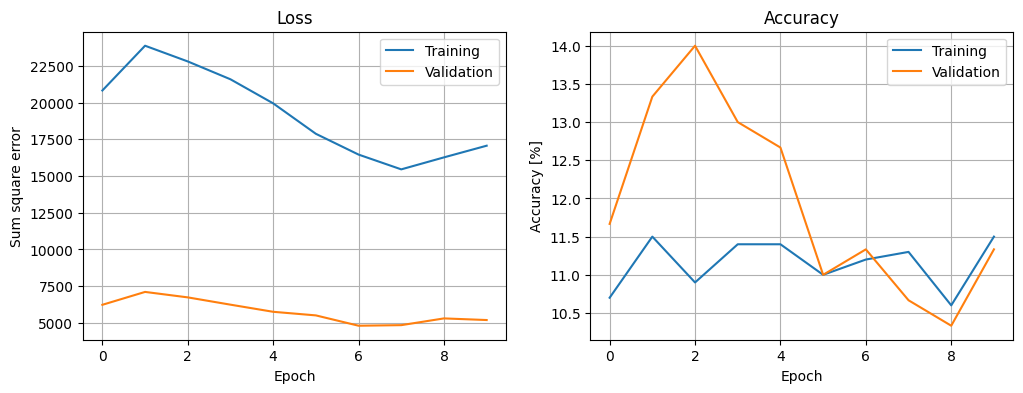

In [13]:
input_layer_neurons  = 28*28 # Image dimensions
hidden_layer_neurons = 30
outut_layer_neurons  = 10    # Number of digits to be recognized
epochs               = 15
lr                   = 0.25
mnist_model = NeuralNetwork(input_layer_neurons, hidden_layer_neurons, outut_layer_neurons, sigmoid, D_sigmoid)

history = mnist_model.train(small_X_train, small_y_train, small_X_val, small_y_val, epochs=epochs, learning_rate=lr)
# In the other compulsory assignments you will not submit notebooks with the training logs
mnist_model.plot_training()

# Task 4: Experiment with different learning rates

In [14]:
input_layer_neurons  = 28*28 # Image dimensions
hidden_layer_neurons = 45
outut_layer_neurons  = 10    # Number of digits to be recognized
epochs               = 15
lrs                  = [1, 0.7, 0.5, 0.3, 0.2]
mnist_model = NeuralNetwork(input_layer_neurons, hidden_layer_neurons, outut_layer_neurons, sigmoid, D_sigmoid)

histories = []
for lr in lrs:
    mnist_model.re_initialize_weights()
    hist =  mnist_model.train(small_X_train, small_y_train, small_X_val, small_y_val, epochs=epochs, learning_rate=lr)
    # In the other compulsory assignments you will not submit notebooks with the training logs
    histories.append(hist)

100%|██████████| 15/15 [00:22<00:00,  1.49s/it]


Training time: 22.29481029510498


100%|██████████| 15/15 [00:22<00:00,  1.51s/it]


Training time: 22.64658522605896


100%|██████████| 15/15 [00:22<00:00,  1.52s/it]


Training time: 22.885537147521973


100%|██████████| 15/15 [00:22<00:00,  1.50s/it]


Training time: 22.4889919757843


100%|██████████| 15/15 [00:22<00:00,  1.48s/it]

Training time: 22.22374701499939


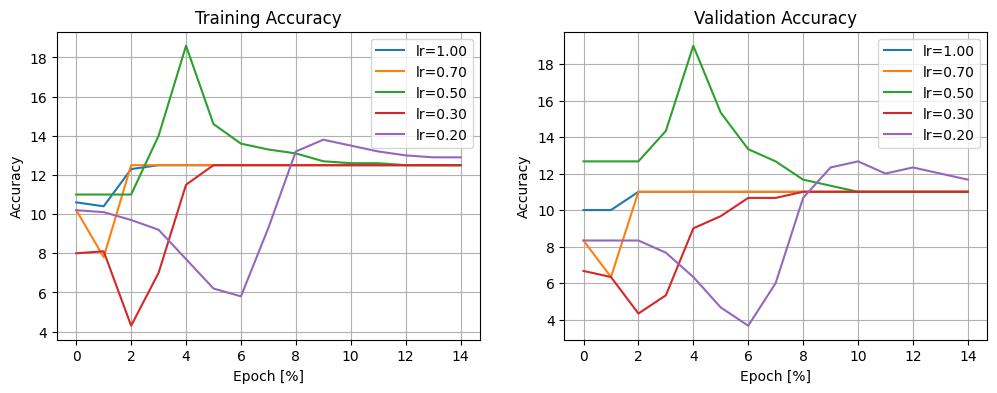

In [15]:
# Plotting
fig, ax = plt.subplots(1,2,figsize=(12,4))

ax[0].set_title('Training Accuracy')
ax[1].set_title('Validation Accuracy')

for idx, lr in enumerate(lrs):
    history = histories[idx]
    ax[0].plot(np.array(history['training_accuracy']), label='lr=%.2f'%lr)
    ax[1].plot(np.array(history['validation_accuracy']), label='lr=%.2f'%lr)

for axes in ax:
    axes.set_xlabel('Epoch [%]')
    axes.set_ylabel('Accuracy')
    axes.grid('on')
    axes.legend()

plt.show()

# Task 5: Experiment with different number of neurons in the hidden layer

In [16]:
input_layer_neurons  = 28*28 # Image dimensions
hidden_layer_neurons = [30, 45, 60, 75]
outut_layer_neurons  = 10    # Number of digits to be recognized
epochs               = 15
lr                   = 0.3

histories = []
for neur in hidden_layer_neurons:
    mnist_model = NeuralNetwork(input_layer_neurons, 
                                neur, 
                                outut_layer_neurons, 
                                sigmoid, 
                                D_sigmoid)
    hist =  mnist_model.train(small_X_train, small_y_train, small_X_val, small_y_val, epochs=epochs, learning_rate=lr)
    # In the other compulsory assignments you will not submit notebooks with the training logs
    histories.append(hist)

100%|██████████| 15/15 [00:23<00:00,  1.54s/it]


Training time: 23.15993356704712


100%|██████████| 15/15 [00:23<00:00,  1.57s/it]


Training time: 23.551014184951782


100%|██████████| 15/15 [00:23<00:00,  1.57s/it]


Training time: 23.503833532333374


100%|██████████| 15/15 [00:23<00:00,  1.57s/it]

Training time: 23.52369523048401


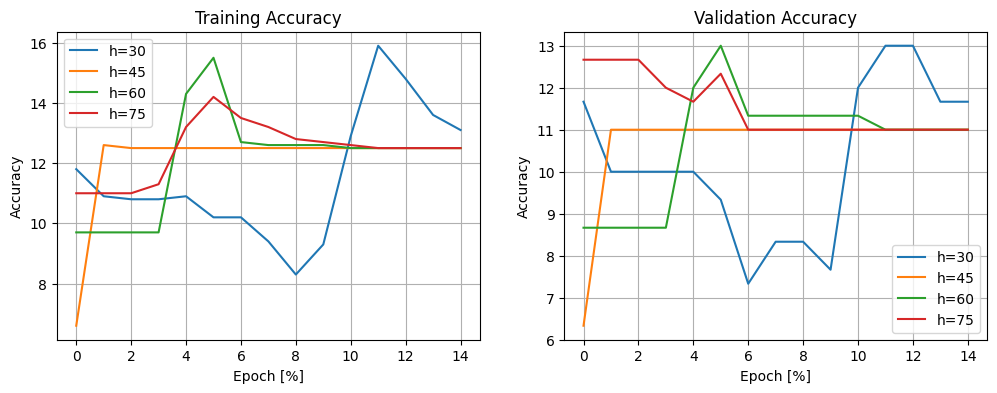

In [17]:
fig, ax = plt.subplots(1,2,figsize=(12,4))

ax[0].set_title('Training Accuracy')
ax[1].set_title('Validation Accuracy')

for idx, neur in enumerate(hidden_layer_neurons):
    history = histories[idx]
    ax[0].plot(np.array(history['training_accuracy']), label='h=%i'%neur)
    ax[1].plot(np.array(history['validation_accuracy']), label='h=%i'%neur)

for axes in ax:
    axes.set_xlabel('Epoch [%]')
    axes.set_ylabel('Accuracy')
    axes.grid('on')
    axes.legend()

plt.show()

# Task 6: Experiment with different activation functions


In [20]:
input_layer_neurons   = 28*28 # Image dimensions
hidden_layer_neurons   = 30
outut_layer_neurons    = 10   # Number of digits to be recognized
epochs                 = 15
lr                     = 0.3
activation_functions   = [sigmoid, tanh]
d_activation_functions = [D_sigmoid, D_tanh]

histories = []
for idx in range(len(activation_functions)):
    mnist_model = NeuralNetwork(input_layer_neurons, 
                                hidden_layer_neurons, 
                                outut_layer_neurons, 
                                activation_functions[idx], 
                                d_activation_functions[idx])
    hist =  mnist_model.train(small_X_train, small_y_train, small_X_val, small_y_val, epochs=epochs, learning_rate=lr)
    # In the other compulsory assignments you will not submit notebooks with the training logs
    histories.append(hist)

100%|██████████| 15/15 [00:23<00:00,  1.54s/it]


Training time: 23.074841022491455


100%|██████████| 15/15 [00:22<00:00,  1.49s/it]

Training time: 22.396494388580322


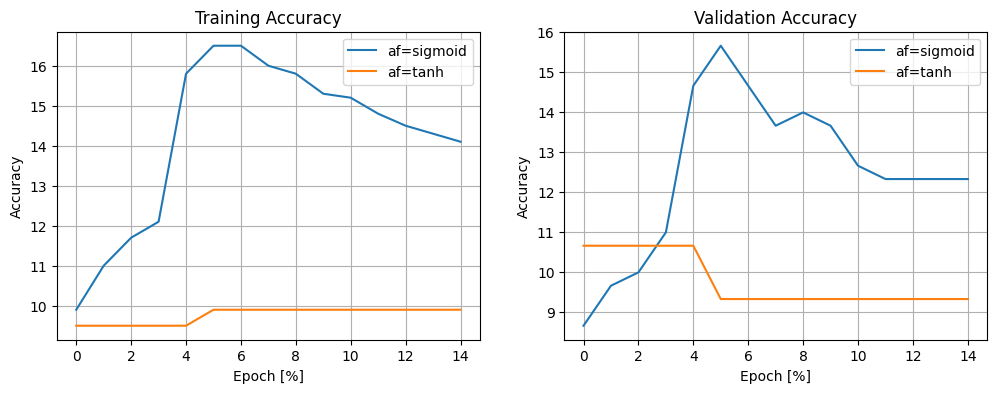

In [21]:
activation_functions = ['sigmoid', 'tanh']
fig, ax = plt.subplots(1,2,figsize=(12,4))

ax[0].set_title('Training Accuracy')
ax[1].set_title('Validation Accuracy')

for idx, af in enumerate(activation_functions):
    history = histories[idx]
    ax[0].plot(np.array(history['training_accuracy']), label='af=%s'%af)
    ax[1].plot(np.array(history['validation_accuracy']), label='af=%s'%af)

for axes in ax:
    axes.set_xlabel('Epoch [%]')
    axes.set_ylabel('Accuracy')
    axes.grid('on')
    axes.legend()

plt.show()

# Task 7: Discuss the results and implement your own network
Comment on your findings from tasks 4 - 6. Will this search suffice for exploring which combination of activation function, learning rate and hidden neuron count is the best? Why, or why not? 

Implement a network with the class you have designed with the hyperparameters of your choice and train it on the entire dataset. Feel free to explore multiple architectures, and evaluate them on `(X_test, y_test)`.
Comment on how long it takes to train the network on the entire dataset compared to the small dataset. 


**Discussion of results from task 4-6:**

The accuracy of the different network implementations vary between 7% and 20% depending on the different configurations of learning rate, number of neurons in the hidden layer and the activation function used. 
* When exploring the different learning rates it is the learning rate of 0.3 that yields the highest validation accuracy.
* When exploring different number of neurons in the hidden layer the 30 and 60 neuron models attain the highest validation accuracy
* When comparing the tanh and sigmoid activation functions, it is sigmoid that comes out as best. 

This hyperparameter search is naive, and is **NOT** an exhaustive search of what is the best model. Here we have kept all parameters fixed except the one that is being varied. For an exhaustive search one has to perform a grid-search to determine which combination of hyperparameters will yield the best model. 

**Code task 7:**

100%|██████████| 15/15 [00:22<00:00,  1.49s/it]


Training time: 22.324710845947266
Test accuracy attained (small dataset): 11.74 %


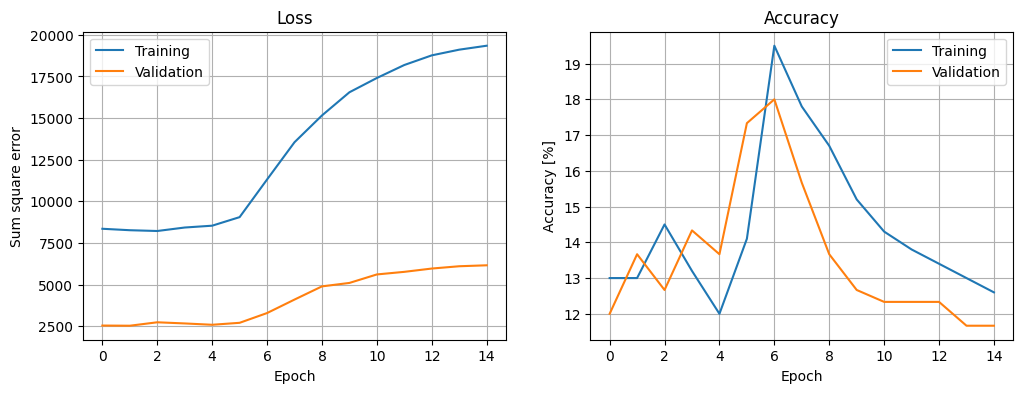

In [26]:
input_layer_neurons  = 28*28 # Image dimensions
hidden_layer_neurons  = 35
outut_layer_neurons   = 10   # Number of digits to be recognized
epochs                = 15
lr                    = 0.3
activation_function   = sigmoid
d_activation_function = D_sigmoid

mnist_model = NeuralNetwork(input_layer_neurons, hidden_layer_neurons, outut_layer_neurons, activation_function, d_activation_function)

# Small dataset
history = mnist_model.train(small_X_train, small_y_train, small_X_val, small_y_val, epochs=epochs, learning_rate=lr)
test_accuracy = mnist_model.evaluate_accuracy(X_test, y_test)
print('Test accuracy attained (small dataset):', test_accuracy, '%')
mnist_model.plot_training()


  0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 5/5 [05:19<00:00, 63.82s/it]


Training time: 319.12426590919495
Test accuracy attained  (big dataset): 9.74 %


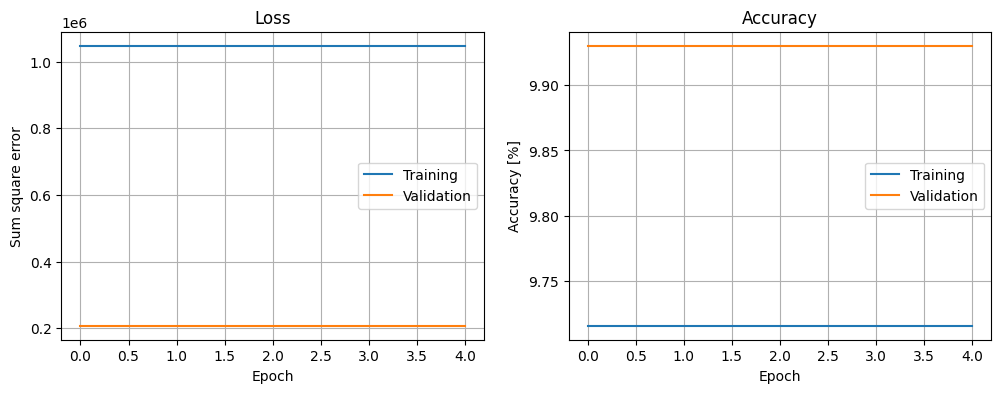

In [28]:
epochs = 5
mnist_model.re_initialize_weights()

# Big dataset
history = mnist_model.train(X_train, y_train, X_val, y_val, epochs=epochs, learning_rate=lr)
test_accuracy = mnist_model.evaluate_accuracy(X_test, y_test)
print('Test accuracy attained  (big dataset):', test_accuracy, '%')
mnist_model.plot_training()

**Discussion of task 7:**

When training the model on the small training set of 1000 training objects and 300 validation objects each epoch took approximately `1.5` seconds on average. When trained on the small dataset, it attained a test accuracy of 11.74 %.

When training the model on the full training set of 50 000 training objects and 10 000 validation objects each epoch took approximately `65` seconds on average. When trained on the entire dataset, it attained a test accuracy of 9.74 %.

From the training plot, it also seems as though the network didn't really improve at all. And, accuracy of roughly 10% isn't any better than randomly guessing the category. This might seem counterintuitive at first, but it is an indicator of two things. 

1. It is hard to implement a network from scratch with numpy, and I hope that this makes you appreciate how much easier things become when we have software libraries such as tensorflow. 
2. This network might not be big enough considering how complex the MNIST task is. 